<a href="https://colab.research.google.com/github/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/blob/master/chapter12/test_models.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install git+https://github.com/benman1/time-series.git

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from tensorflow.python.framework.ops import disable_eager_execution
import tensorflow as tf

disable_eager_execution()  # for graph mode
tf.compat.v1.experimental.output_all_intermediates(True)

In [11]:
from time_series.dataset.utils import get_energy_demand
from time_series.dataset.time_series import TrainingDataSet

train_df = get_energy_demand()
tds = TrainingDataSet(train_df)

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def evaluate_model(tds=tds, first_n=0):
    print(f"MSE: {mean_squared_error(y_predicted.reshape(-1,), tds.y_test.reshape(-1,)):.4f}")
    dimensions = len(train_df.columns)
    plt.figure(figsize=(12, 18))
    grid = plt.GridSpec(dimensions, 1 if first_n else 2, wspace=0.5, hspace=0.2)

    for i in range(dimensions):    
        y_pred, y_actual = y_predicted[:, i, 0], tds.y_test[:, i, 0]
        ax = plt.subplot(grid[i, 0])
        y_pred, y_actual = y_pred[:first_n], y_actual[:first_n]
        plt.plot(y_pred, 'r+--', label="predicted")
        plt.plot(y_actual, 'bo-.', label="actual")
        ax.set_title(list(train_df.columns)[i])
        print(f"{train_df.columns[i]}: {round(mean_squared_error(y_actual, y_pred), 2)}")
    plt.legend()

In [19]:
from time_series.models.deepar import DeepAR

ar_model = DeepAR(tds, epochs=1000)
ar_model.instantiate_and_fit(verbose=1)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10, 10)]          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 4)             240       
_________________________________________________________________
dense_2 (Dense)              (None, 10, 4)             20        
_________________________________________________________________
main_output (GaussianLayer)  [(None, 10, 10), (None, 1 100       
Total params: 360
Trainable params: 360
Non-trainable params: 0
_________________________________________________________________
Train on 99336 samples
Epoch 1/1000
99336/99336 [==============================] - 18s 179us/sample - loss: 0.9575 - mean_absolute_percentage_error: 303.4122 - mae: 0.5247 - mse: 0.4896
Epoch 2/1000
99336/99336 [==============================] - 20s 197us/sam

MSE: 0.1857
CT: 1.01
MASS: 0.5
ME: 0.11
NEMASSBOST: 0.35
NH: 0.56
RI: 0.36
SEMASS: 0.51
TOTAL: 0.47
VT: 0.26
WCMASS: 0.49


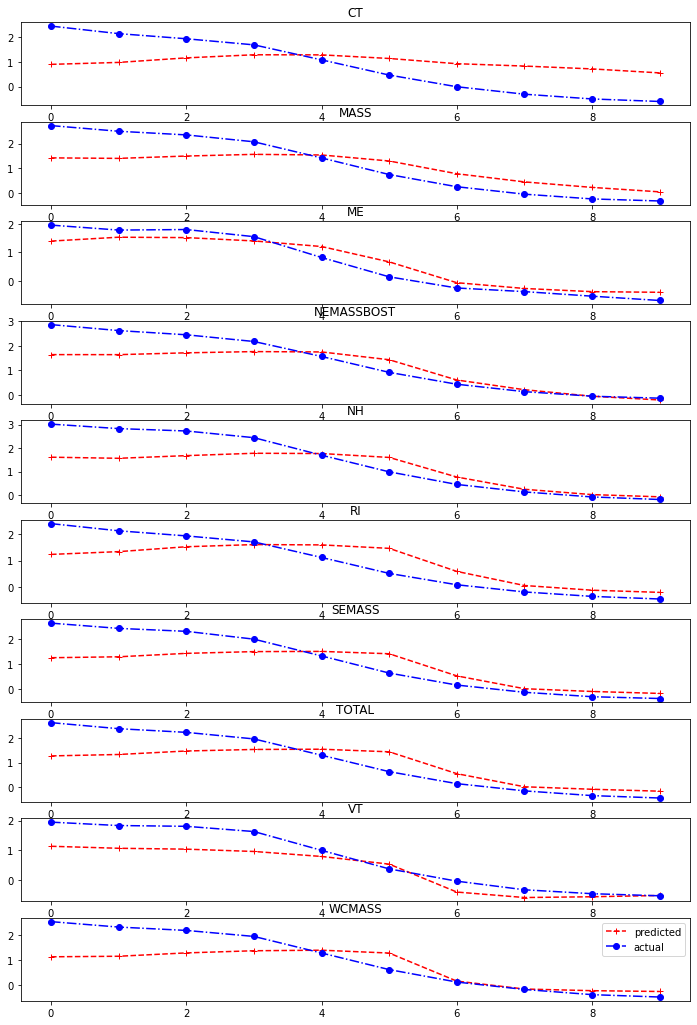

In [34]:
y_predicted = ar_model.model.predict(tds.X_test)
evaluate_model(first_n=10)

In [21]:
from timehistorys.models.nbeats import NBeatsNet

nb = NBeatsNet(tds)
nb.instantiate_and_fit(verbose=1, epochs=1000)
#y_predicted = nb.model.predict(tds.X_test, steps=10)
#evaluate_model(first_n=10)
print(nb.model.evaluate(tds.X_test, tds.y_test))

Model: "forecast"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_variable (InputLayer)     [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 10)           0           input_variable[0][0]             
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 10)           0           input_variable[0][0]             
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 10)           0           input_variable[0][0]             
___________________________________________________________________________________________

/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.6466768020421476


/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


MSE: 0.7715
CT: 0.16
MASS: 0.11
ME: 0.04
NEMASSBOST: 0.15
NH: 0.22
RI: 0.09
SEMASS: 0.1
TOTAL: 0.13
VT: 0.14
WCMASS: 0.15


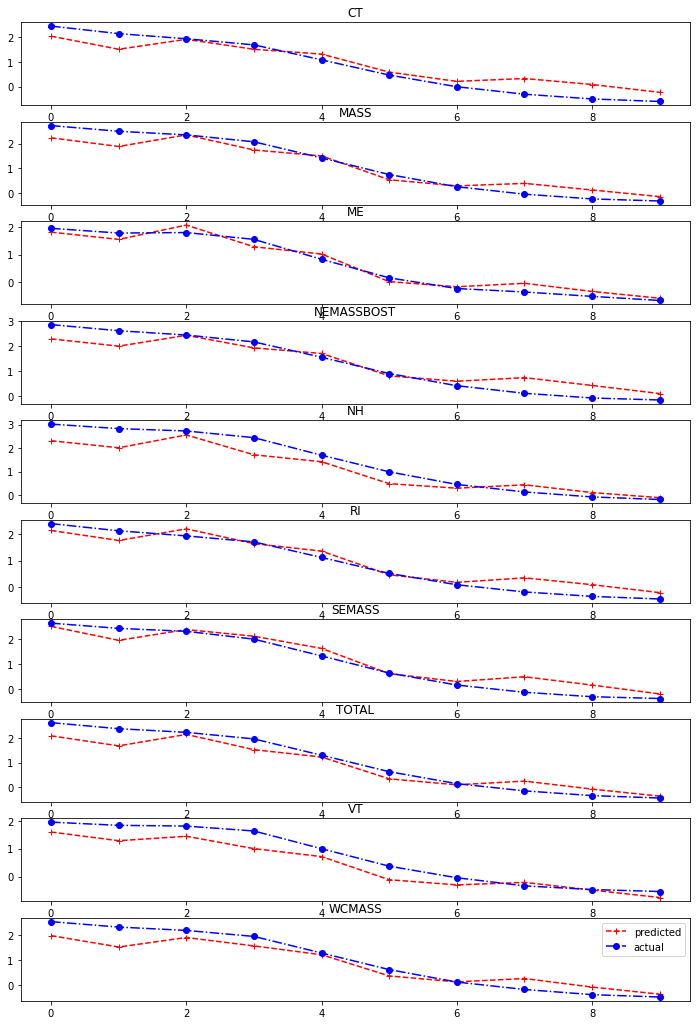

In [38]:
y_predicted = nb.model.predict(tds.X_test)
evaluate_model(first_n=10)

In [22]:
from time_series.models.LSTM import LSTM
lstm = LSTM(tds)
lstm.instantiate_and_fit(verbose=1, epochs=1000)
#y_predicted = lstm.model.predict(tds.X_test, steps=10)
#evaluate_model(first_n=10)
print(lstm.model.evaluate(tds.X_test, tds.y_test))

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 10, 10)]          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 100)           44400     
_________________________________________________________________
dense_3 (Dense)              (None, 10, 10)            1010      
Total params: 45,410
Trainable params: 45,410
Non-trainable params: 0
_________________________________________________________________
None
Train on 99336 samples
Epoch 1/1000
99336/99336 [==============================] - 28s 281us/sample - loss: 0.3642 - mean_absolute_percentage_error: 270.8392 - mae: 0.4421 - mse: 0.3642
Epoch 2/1000
99336/99336 [==============================] - 28s 284us/sample - loss: 0.1809 - mean_absolute_percentage_error: 253.9886 - mae: 0.3079 - mse: 0.1809
Epoch 3/1000
99336/99336 [=====

/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


MSE: 0.0663
CT: 0.19
MASS: 0.04
ME: 0.03
NEMASSBOST: 0.01
NH: 0.05
RI: 0.07
SEMASS: 0.03
TOTAL: 0.01
VT: 0.14
WCMASS: 0.03


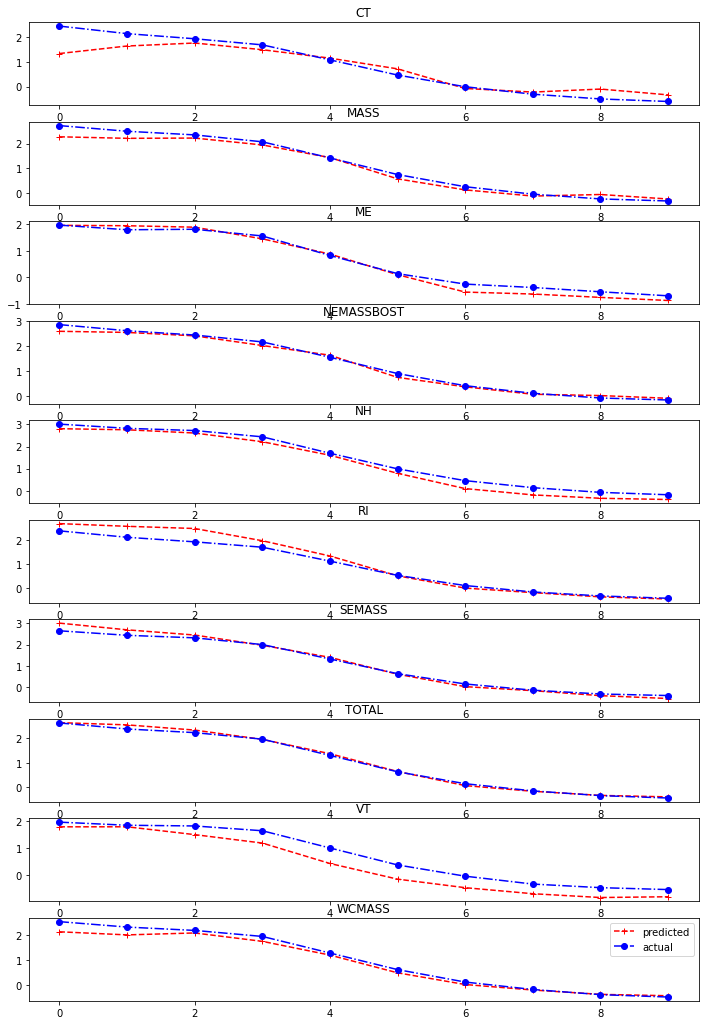

In [39]:
y_predicted = lstm.model.predict(tds.X_test)
evaluate_model(first_n=10)

In [83]:
#tds_1step = TrainingDataSet(train_df, lag=tds.lag, two_dim=False)
#tds_1step.y_test = tds_1step.y_test[:, :, 0]
#tds_1step.y_train = tds_1step.y_train[:, :, 0]

In [86]:
# only training a 1-step prediction here:
from time_series.models.transformer import Transformer

trans = Transformer(tds)
trans.instantiate_and_fit(verbose=1, epochs=1000)
print(trans.model.evaluate(tds.X_test, tds.y_test))

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
multi_head_attention_2 (MultiHe (None, 10, 10)       22026       input_7[0][0]                    
                                                                 input_7[0][0]                    
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 10, 10)       0           multi_head_attention_2[0][0]     
__________________________________________________________________________________________________
layer_normalization_4 (LayerNor (None, 10, 10)       20          dropout_9[0][0]            

/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[0.9304803350684866, 104.639946, 0.7673769, 0.93048024]


MSE: 0.9305
CT: 1.94
MASS: 2.62
ME: 1.44
NEMASSBOST: 2.85
NH: 3.41
RI: 1.86
SEMASS: 2.47
TOTAL: 2.35
VT: 1.48
WCMASS: 2.24


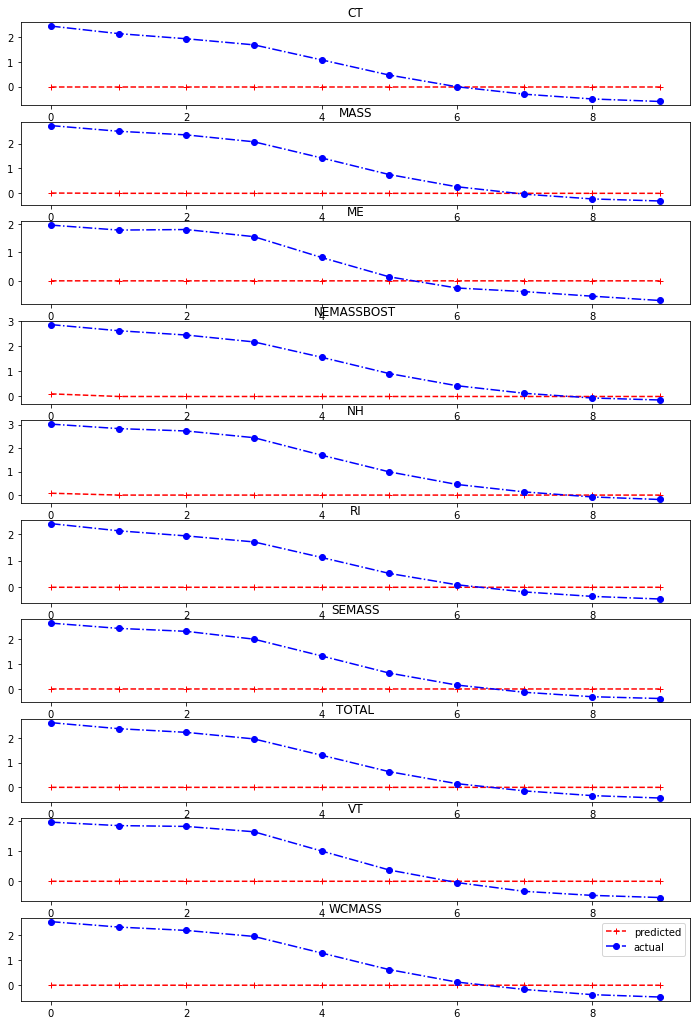

In [90]:
y_predicted = trans.model.predict(tds.X_test)  # .reshape(-1, 10)
evaluate_model(tds=tds, first_n=10)

In [6]:
# this only works in Eager mode! You might have to restart your notebook.
from time_series.models.gaussian_process import GaussianProcess
tds2d = TrainingDataSet(train_df.head(500), train_split=0.1, two_dim=True)
gp = GaussianProcess(tds2d)
gp.instantiate_and_fit(maxiter=100)

╒═══════════════════════╤═══════════╤═════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                  │ class     │ transform   │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═══════════════════════╪═══════════╪═════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ Matern52.variance     │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
├───────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ Matern52.lengthscales │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
╘═══════════════════════╧═══════════╧═════════════╧═════════╧═════════════╧═════════╧═════════╧═════════╛
╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════╪═════

CT: 2.59
MASS: 0.72
ME: 0.11
NEMASSBOST: 0.74
NH: 2.94
RI: 1.57
SEMASS: 1.09
TOTAL: 0.56
VT: 0.21
WCMASS: 0.52


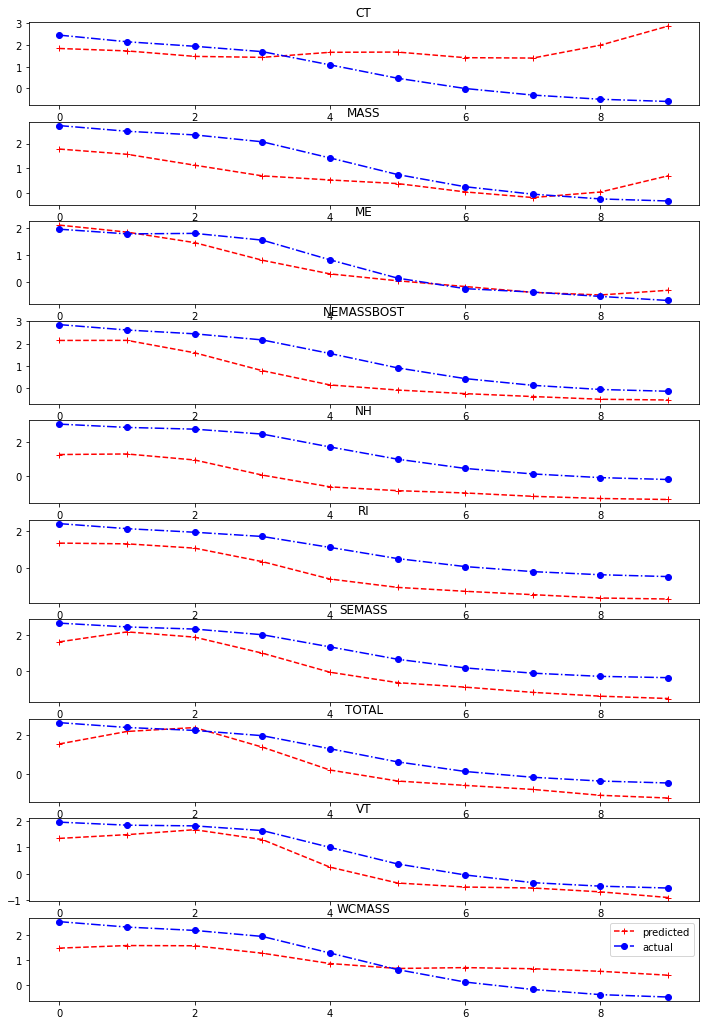

In [7]:
y_predicted = gp.predict(tds2d.X_test)[0].numpy().reshape(-1, tds.dimensions, tds.n_steps)#%%
evaluate_model(first_n=10)